# **Projeto de Dados Médicos**
## **Grupo**

*   Alex Damascena
*   Gabriel Felipo
*   Guilherme Afonso
*   Guilherme Souza
*   João Vitor Almeida
*   Lorena Vilaça
*   Lucas Rodrigues
*   Sofia Melo

## **Dataset Escolhido**
Escolhemos o **"Predict students' dropout and academic succes"**, que inclui informações conhecidas no momento da matrícula dos alunos (trajetória acadêmica, dados demográficos e fatores socioeconômicos) e o desempenho acadêmico dos alunos ao final do primeiro e segundo semestres. Os dados são usados para construir modelos de classificação para prever a desistência e o sucesso acadêmico dos alunos. O problema é formulado como uma tarefa de classificação de três categorias, em que existe um desequilíbrio significativo em direção a uma das classes.

# Student Dropout

## Install dependencies

In [49]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Load data and libs

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import optuna
import plotly
import optuna.visualization as vis

pd.set_option('display.max_columns', None)
df = pd.read_csv("./datasets/data.csv", sep=";")
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Info

In [51]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Showing dataset head

In [52]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Spliting data


In [53]:
label_encoder = LabelEncoder()

# Aplicar o label encoding a uma coluna categórica
df['Target'] = label_encoder.fit_transform(df['Target'])

y = df['Target']
X = df.drop('Target', axis=1)


# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32 , random_state=42)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


## Algorithms

### Dummy Classifier  
- Usado como uma linha de base para avaliar o desempenho dos outros modelos.
- Determinar se os outros modelos estão fazendo previsões significativamente melhores do que um modelo que simplesmente escolhe classificações aleatórias (o dummy)

In [54]:
## dummy

from sklearn.dummy import DummyClassifier
 
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
predict = dummy.predict(X_train)

score = dummy.score(X_train, y_train)
print(score)



0.5066489361702128


Checando qual melhor SVC mudando os Kernels. O melhor resultado sem nenhuma mudança de parâmetros foi o linear.


In [55]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def getClassifier(ktype):
    if ktype == 0:
        return SVC(kernel='poly')
    elif ktype == 1:
        return SVC(kernel='rbf')
    elif ktype == 2:
        return SVC(kernel='sigmoid')
    elif ktype == 3:
        return SVC(kernel='linear')

for index in range(4):
    svclassifier = getClassifier(index)
    print(svclassifier)
    svclassifier.fit(X_train, y_train)
    
    svclassifier.fit(X_train, y_train)
    
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[index], "kernel")
    print(classification_report(y_test,y_pred))

SVC(kernel='poly')
Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       308
           1       0.00      0.00      0.00       160
           2       0.47      1.00      0.64       417

    accuracy                           0.47       885
   macro avg       0.16      0.33      0.21       885
weighted avg       0.22      0.47      0.30       885

SVC()


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       308
           1       0.00      0.00      0.00       160
           2       0.47      1.00      0.64       417

    accuracy                           0.47       885
   macro avg       0.16      0.33      0.21       885
weighted avg       0.22      0.47      0.30       885

SVC(kernel='sigmoid')


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.34      0.06      0.11       308
           1       0.00      0.00      0.00       160
           2       0.47      0.93      0.63       417

    accuracy                           0.46       885
   macro avg       0.27      0.33      0.24       885
weighted avg       0.34      0.46      0.33       885

SVC(kernel='linear')


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       308
           1       0.44      0.20      0.27       160
           2       0.75      0.93      0.83       417

    accuracy                           0.74       885
   macro avg       0.67      0.64      0.63       885
weighted avg       0.71      0.74      0.72       885



Achando hiper-parametro


### SVM Model RBF (Default)
- Não é ideal então não desenvolvemos mais sobre ele

In [56]:
# Criar o modelo de SVM
model = SVC() ## isso usa rbf como default 

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [57]:
# Avaliar a precisão do modelo
accuracy_score(y_test, y_pred)


0.4711864406779661

In [58]:
# Criar a matriz de confusão
confusion_matrix(y_test, y_pred)

array([[  0,   0, 308],
       [  0,   0, 160],
       [  0,   0, 417]])

In [59]:
# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       308
           1       0.00      0.00      0.00       160
           2       0.47      1.00      0.64       417

    accuracy                           0.47       885
   macro avg       0.16      0.33      0.21       885
weighted avg       0.22      0.47      0.30       885



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM Model Linear


In [60]:
# Criar o modelo de SVM
model = SVC(kernel='linear')

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Fazer previsões nos dados de teste
accuracy_linear = model.score(X_test, y_test)
print(accuracy_linear)

0.7446327683615819


In [61]:
# Avaliar a precisão do modelo
accuracy_score(y_test, y_pred)


0.7446327683615819

In [62]:
# Criar a matriz de confusão
confusion_matrix(y_test, y_pred)

array([[241,  22,  45],
       [ 45,  32,  83],
       [ 12,  19, 386]])

In [63]:
# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       308
           1       0.44      0.20      0.27       160
           2       0.75      0.93      0.83       417

    accuracy                           0.74       885
   macro avg       0.67      0.64      0.63       885
weighted avg       0.71      0.74      0.72       885



#### Hyperparameters Adjustment

In [64]:
param_grid = {
    'C': [0.1, 1, 10, 100],
}

svm = SVC(kernel='linear')

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

final_model = grid_search.best_estimator_
final_accuracy = final_model.score(X_test, y_test)
print("Acurácia no conjunto de teste:", final_accuracy)

Melhores hiperparâmetros: {'C': 0.1}
Acurácia no conjunto de teste: 0.7615819209039548


#### Feature Selection
- A função de pontuação f_classif calcula o valor F da análise de variância (ANOVA) entre cada recurso e a variável alvo, e os recursos com os maiores valores F são selecionados como os melhores recursos (35 no caso)
- Não melhorou

In [65]:

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=35)
  
# Fit the selector to the data
selector.fit(X_train, y_train)
  
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
  
# Train the classifier
reg = SVC(kernel='linear')
reg.fit(X_train_selected, y_train)
# Prediction
y_pred = reg.predict(X_test_selected)
accuracy_score(y_test, y_pred)



0.7491525423728813

### SVM Model Poly


In [66]:
# Criar o modelo de SVM
model = SVC(kernel='poly', degree=30, C=100.0, gamma='scale')

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [67]:
# Avaliar a precisão do modelo
accuracy_score(y_test, y_pred)


0.6587570621468927

In [68]:
# Criar a matriz de confusão
confusion_matrix(y_test, y_pred)

array([[171,  10, 127],
       [ 21,   6, 133],
       [  6,   5, 406]])

In [69]:
# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68       308
           1       0.29      0.04      0.07       160
           2       0.61      0.97      0.75       417

    accuracy                           0.66       885
   macro avg       0.59      0.52      0.50       885
weighted avg       0.64      0.66      0.60       885



#### Hyperparameters Adjustment
- Rodou por um dia mas não conseguiu terminar

In [71]:
# param_grid = {
#     'degree': [1, 5, 10, 20, 30],
#     'C': [0.1, 1, 10, 100],
#     'gamma' : ['scale', 'auto']
# }

# svm = SVC(kernel='poly', degree=30, C=100.0, gamma='scale')

# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Melhores hiperparâmetros:", best_params)

# final_model = grid_search.best_estimator_
# final_accuracy = final_model.score(X_test, y_test)
# print("Acurácia no conjunto de teste:", final_accuracy)

#### Feature Selection

In [72]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=36)
  
# Fit the selector to the data
selector.fit(X_train, y_train)
  
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
  
# Train the classifier
reg = SVC(kernel='poly', degree=30, C=100.0, gamma='scale')
reg.fit(X_train_selected, y_train)
# Prediction
y_pred = reg.predict(X_test_selected)
accuracy_score(y_test, y_pred)

0.6587570621468927

### Logistic Regression

In [73]:
# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

#### Simple prediction

In [74]:
# Criar o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [75]:
# Avaliar a precisão do modelo
accuracy_score(y_test, y_pred)

0.6677966101694915

### Matriz de confusão
- 0 -> Dropout
- 1 -> Enrolled
- 2 -> Graduate


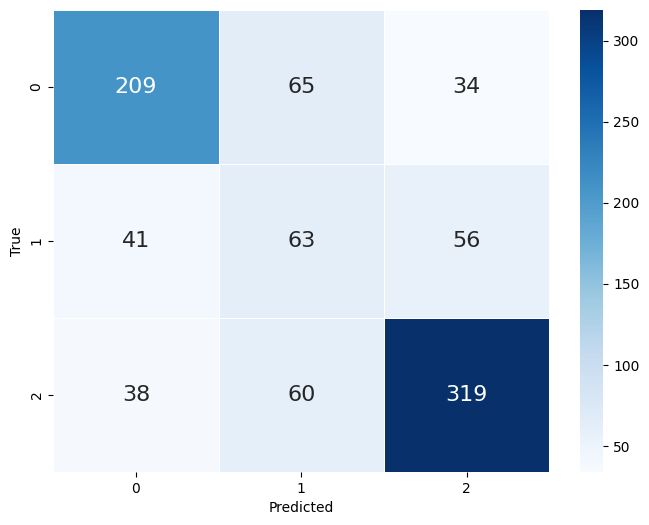

In [76]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
# Crie um heatmap para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       308
           1       0.34      0.39      0.36       160
           2       0.78      0.76      0.77       417

    accuracy                           0.67       885
   macro avg       0.61      0.61      0.61       885
weighted avg       0.68      0.67      0.67       885



##### Cross Validation
- Dividir o conjunto de dados em subconjuntos de treinamento e teste de maneira repetida, permitindo que o modelo seja avaliado várias vezes em diferentes partições dos dados.

In [78]:
# Defina o número de folds (geralmente 5 ou 10 são comuns)
num_folds = 10

# Crie um objeto KFold para controlar a divisão dos dados
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realize a validação cruzada e obtenha as pontuações de desempenho (por padrão, a métrica é a acurácia)
scores = cross_val_score(model, X, y, cv=kf)

# Exiba as pontuações
print("Média das pontuações:", scores.mean())
print("Desvio padrão das pontuações:", scores.std())

Média das pontuações: 0.6842200954005496
Desvio padrão das pontuações: 0.017079179855524422


#### Learning curve


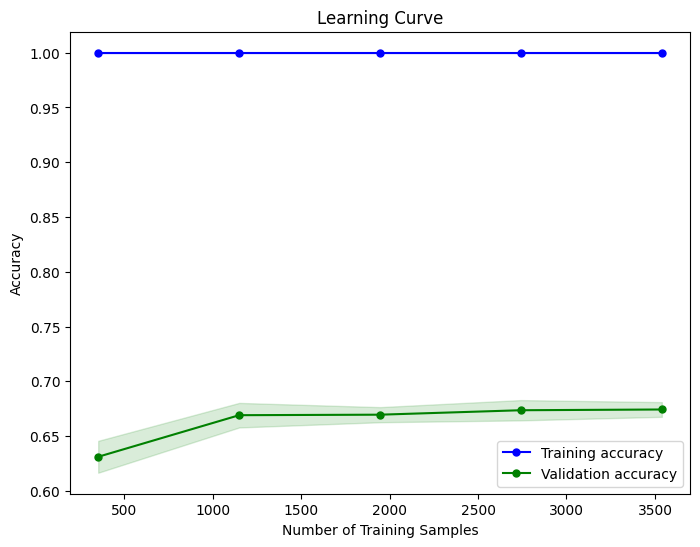

In [79]:

# Crie a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calcule as médias e os desvios padrão das pontuações
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crie o gráfico da curva de aprendizado
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, marker='o', color='green', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest

#### Initial prediction


In [80]:
# Criar o modelo de floresta aleatória
model = RandomForestClassifier()

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)
# Avaliar a precisão do modelo
accuracy_score(y_test, y_pred)

0.751412429378531

### Matriz de confusão
- 0 -> Dropout
- 1 -> Enrolled
- 2 -> Graduate

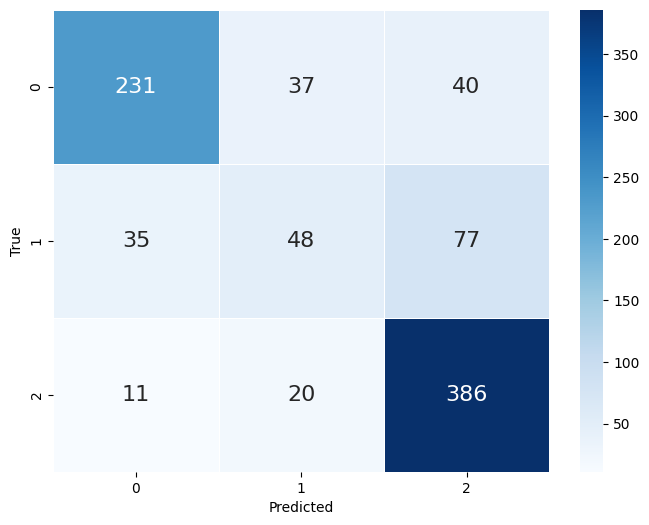

In [81]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
# Crie um heatmap para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [82]:
# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       308
           1       0.46      0.30      0.36       160
           2       0.77      0.93      0.84       417

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.66       885
weighted avg       0.73      0.75      0.74       885



##### Learning curve


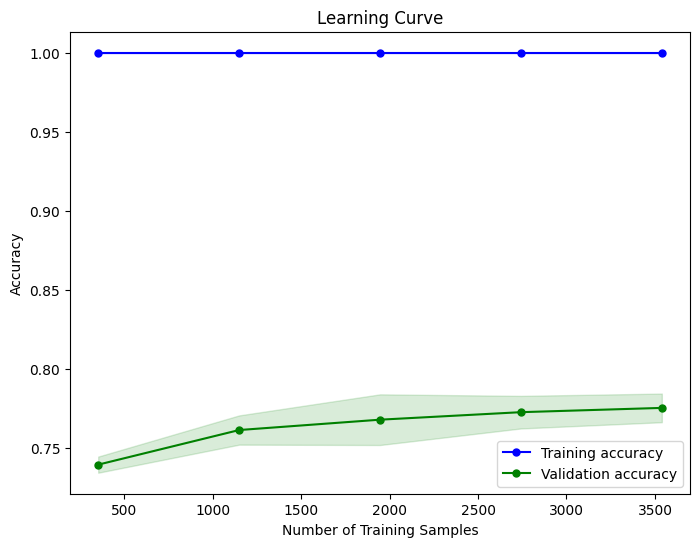

In [83]:

# Crie a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calcule as médias e os desvios padrão das pontuações
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crie o gráfico da curva de aprendizado
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, marker='o', color='green', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

##### Cross Validation
- Dividir o conjunto de dados em subconjuntos de treinamento e teste de maneira repetida, permitindo que o modelo seja avaliado várias vezes em diferentes partições dos dados.

In [84]:
# Defina o número de folds (geralmente 5 ou 10 são comuns)
num_folds = 10

# Crie um objeto KFold para controlar a divisão dos dados
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realize a validação cruzada e obtenha as pontuações de desempenho (por padrão, a métrica é a acurácia)
scores = cross_val_score(model, X, y, cv=kf)

# Exiba as pontuações
print("Média das pontuações:", scores.mean())
print("Desvio padrão das pontuações:", scores.std())

Média das pontuações: 0.7766820220013686
Desvio padrão das pontuações: 0.014813673273926454


#### Hyperparameters Adjustment

In [85]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

final_model = grid_search.best_estimator_
final_accuracy = final_model.score(X_test, y_test)
print("Acurácia no conjunto de teste:", final_accuracy)

Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Acurácia no conjunto de teste: 0.7446327683615819


In [86]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': uniform(0.01, 0.199),
    'min_samples_leaf': uniform(0.01, 0.199)
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=10, n_iter=100, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Melhores hiperparâmetros:", best_params)

final_model = random_search.best_estimator_
final_accuracy = final_model.score(X_test, y_test)
print("Acurácia no conjunto de teste:", final_accuracy)

Melhores hiperparâmetros: {'max_depth': 30, 'min_samples_leaf': 0.018736528800273766, 'min_samples_split': 0.01064071674617026, 'n_estimators': 300}
Acurácia no conjunto de teste: 0.7175141242937854


##### Using Optuna
- Escolha de hiperparametro

In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Defina os hiperparâmetros para otimização
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    # Crie o modelo com os hiperparâmetros sugeridos
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Treine e avalie o modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    # Retorne a métrica para otimização (neste caso, precisão)
    return accuracy

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=300)

# Obtenha os melhores hiperparâmetros encontrados
best_params = study.best_params
print("Melhores hiperparâmetros:", best_params)

best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

[I 2023-09-18 21:50:16,764] A new study created in memory with name: no-name-c52b9c4b-cc81-4db8-9deb-707ab8a89542
[I 2023-09-18 21:50:16,811] Trial 0 finished with value: 0.47231638418079097 and parameters: {'n_estimators': 78, 'max_depth': 8, 'min_samples_split': 0.43374603431766956, 'min_samples_leaf': 0.4911385356220834}. Best is trial 0 with value: 0.47231638418079097.
[I 2023-09-18 21:50:16,833] Trial 1 finished with value: 0.47231638418079097 and parameters: {'n_estimators': 22, 'max_depth': 19, 'min_samples_split': 0.32946152923989935, 'min_samples_leaf': 0.3017290733084419}. Best is trial 0 with value: 0.47231638418079097.
[I 2023-09-18 21:50:16,874] Trial 2 finished with value: 0.47231638418079097 and parameters: {'n_estimators': 76, 'max_depth': 6, 'min_samples_split': 0.7406283829627525, 'min_samples_leaf': 0.15552009340442258}. Best is trial 0 with value: 0.47231638418079097.
[I 2023-09-18 21:50:16,938] Trial 3 finished with value: 0.47231638418079097 and parameters: {'n_es

Melhores hiperparâmetros: {'n_estimators': 14, 'max_depth': 13, 'min_samples_split': 0.215211964616359, 'min_samples_leaf': 0.11426144849981658}


In [ ]:
# vis.plot_optimization_history(study)
# vis.plot_parallel_coordinate(study)

#### Feature Selection
- Usado com os melhores hiperparametros - melhores resultados

In [99]:
from sklearn.feature_selection import SelectFromModel
thresholds = [0.1, 0.01, 0.001, 0.0001]
for threshold in thresholds:
  selector = SelectFromModel(model, threshold=threshold)
  selector.fit(X_train, y_train)


  X_train_selected = selector.transform(X_train)
  X_test_selected = selector.transform(X_test)
  # Criar o modelo de floresta aleatória
  model = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators = 300)
  # Treinar o modelo nos dados de treinamento
  model.fit(X_train_selected, y_train)

  # Fazer previsões nos dados de teste
  y_pred = model.predict(X_test_selected)
  # Avaliar a precisão do modelo
  print(accuracy_score(y_test, y_pred))


0.7661016949152543
0.9152542372881356
0.9129943502824859
0.9152542372881356


#### Matriz de confusao
- 0 -> Dropout
- 1 -> Enrolled
- 2 -> Graduate

-> Teve dificuldade em achar os enrolled, mas o mais importante que foi o dropout teve 1/3 de erro

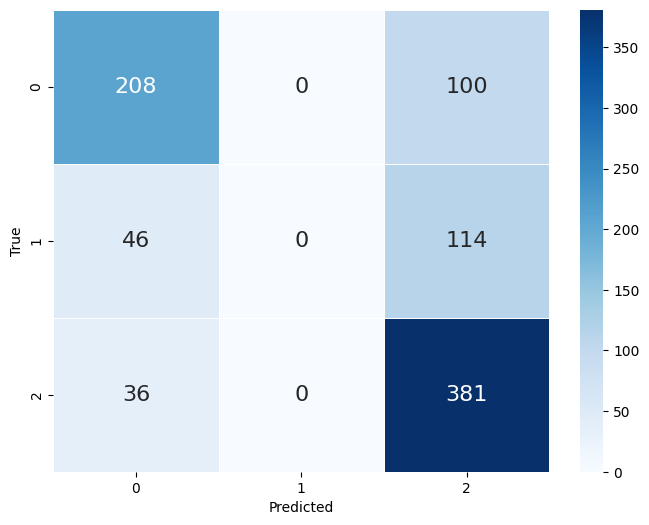

In [89]:
cm = confusion_matrix(y_test, y_pred)
# Crie um heatmap para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Base INEP


## 2010 - 2019

### Reading Data

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2010_2019.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,TAP,TCA,TDA,TCAN,TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2010,6,2015,10,2019,107,98,1,8,0,91.6,0.9,7.5,0.9,7.5
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2011,6,2015,10,2019,107,90,0,8,0,84.1,0.9,15.0,0.0,7.5
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2012,6,2015,10,2019,107,87,2,1,0,81.3,2.8,15.9,1.9,0.9
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2013,6,2015,10,2019,107,83,2,2,0,77.6,4.7,17.8,1.9,1.9
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2014,6,2015,10,2019,107,27,54,2,0,25.2,55.1,19.6,50.5,1.9


### Data Info

In [ ]:
df.describe()

,Código da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,TAP,TCA,TDA,TCAN,TADA
count,259230.000000,259230.000000,259230.000000,2.592300e+05,252260.000000,252260.000000,2.522600e+05,259230.000000,259230.000000,259230.000000,259230.0,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000,259230.000000
mean,1598.317054,3.562358,1.818269,2.518498e+05,3.058234,34.088440,3.427300e+06,1.584192,1.026887,4.547005,2010.0,2014.500000,4.893377,2013.893377,7.855495,2016.855495,99.272808,28.466277,3.929518,5.903796,0.004610,28.906190,25.927922,45.167302,4.066406,5.837973
std,2643.206984,1.517075,0.924971,6.772818e+05,0.999277,9.149073,9.154448e+05,0.761520,0.161754,2.856170,0.0,2.872287,0.972114,0.972114,1.791821,1.791821,305.735519,112.908346,29.472771,40.487535,0.073476,35.118367,25.186402,27.599185,9.939935,10.950172
min,1.000000,1.000000,1.000000,1.000000e+00,1.000000,11.000000,1.100023e+06,1.000000,1.000000,1.000000,2010.0,2010.000000,1.000000,2010.000000,2.000000,2011.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,322.000000,2.000000,1.000000,3.195900e+04,3.000000,31.000000,3.103504e+06,1.000000,1.000000,2.000000,2010.0,2012.000000,4.000000,2013.000000,7.000000,2016.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000
50%,641.000000,4.000000,1.000000,7.727400e+04,3.000000,35.000000,3.513009e+06,1.000000,1.000000,4.000000,2010.0,2014.500000,5.000000,2014.000000,8.000000,2017.000000,57.000000,5.000000,0.000000,1.000000,0.000000,8.300000,21.700000,45.100000,0.000000,1.300000
75%,1803.000000,5.000000,3.000000,1.118840e+05,4.000000,41.000000,4.106902e+06,2.000000,1.000000,7.000000,2010.0,2017.000000,6.000000,2015.000000,10.000000,2019.000000,102.000000,31.000000,2.000000,5.000000,0.000000,58.600000,44.200000,65.000000,2.900000,7.100000
max,23410.000000,7.000000,5.000000,5.001242e+06,5.000000,53.000000,5.300108e+06,3.000000,2.000000,10.000000,2010.0,2019.000000,10.000000,2019.000000,10.000000,2019.000000,26946.000000,15180.000000,5854.000000,11765.000000,10.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
label_encoder = LabelEncoder()

# Aplicar o label encoding a uma coluna categórica
df['Nome da Instituição'] = label_encoder.fit_transform(df['Nome da Instituição'])
df['Código do Município do Curso'] = label_encoder.fit_transform(df['Código do Município do Curso'])
df['Código da Unidade Federativa do Curso'] = label_encoder.fit_transform(df['Código da Unidade Federativa do Curso'])
df['Código da Região Geográfica do Curso'] = label_encoder.fit_transform(df['Código da Região Geográfica do Curso'])
df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL'] = label_encoder.fit_transform(df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL'])
df['Nome da área do Curso segundo a classificação CINE BRASIL'] = label_encoder.fit_transform(df['Nome da área do Curso segundo a classificação CINE BRASIL'])
df['Código da área do Curso segundo a classificação CINE BRASIL'] = label_encoder.fit_transform(df['Código da área do Curso segundo a classificação CINE BRASIL'])
df['Nome do Curso de Graduação'] = label_encoder.fit_transform(df['Nome do Curso de Graduação'])
y = df['TDA']
X = df.drop('TDA', axis=1) 


# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo de regressão logística
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 0.008585572445318835
R-squared: 0.9999887930978675


## 2011 - 2020

In [ ]:
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2011_2020.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2011,2011,6,2016,10,2020,94,94,0,0,0,100.0,0.0,0.0,0.0,0.0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2011,2012,6,2016,10,2020,94,90,0,4,0,95.7,0.0,4.3,0.0,4.3
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2011,2013,6,2016,10,2020,94,85,1,4,0,90.4,1.1,8.5,1.1,4.3
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2011,2014,6,2016,10,2020,94,79,4,2,0,84.0,5.3,10.6,4.3,2.1
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2011,2015,6,2016,10,2020,94,24,53,2,0,25.5,61.7,12.8,56.4,2.1


## 2012 - 2021

### Reading data

In [ ]:
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2012_2021.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2012,2012,6,2017,10,2021,113,111,1,1,0,98.2,0.9,0.9,0.9,0.9
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2012,2013,6,2017,10,2021,113,101,6,4,0,89.4,6.2,4.4,5.3,3.5
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2012,2014,6,2017,10,2021,113,94,5,2,0,83.2,10.6,6.2,4.4,1.8
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2012,2015,6,2017,10,2021,113,83,9,2,0,73.5,18.6,8.0,8.0,1.8
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2012,2016,6,2017,10,2021,113,27,50,6,0,23.9,62.8,13.3,44.2,5.3


## 2013 - 2021

In [ ]:
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2013_2021.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2013,2013,6,2018,10,2022,94,94,0,0,0,100.0,0.0,0.0,0.0,0.0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2013,2014,6,2018,10,2022,94,88,1,5,0,93.6,1.1,5.3,1.1,5.3
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2013,2015,6,2018,10,2022,94,80,4,4,0,85.1,5.3,9.6,4.3,4.3
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2013,2016,6,2018,10,2022,94,73,3,4,0,77.7,8.5,13.8,3.2,4.3
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2013,2017,6,2018,10,2022,94,21,45,7,0,22.3,56.4,21.3,47.9,7.4


## 2014 - 2021

In [ ]:
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2014_2021.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2014,2014,6,2019,10,2023,113,103,9,1,0,91.2,8.0,0.9,8.0,0.9
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2014,2015,6,2019,10,2023,113,96,4,3,0,85.0,11.5,3.5,3.5,2.7
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2014,2016,6,2019,10,2023,113,92,2,2,0,81.4,13.3,5.3,1.8,1.8
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2014,2017,6,2019,10,2023,113,80,4,8,0,70.8,16.8,12.4,3.5,7.1
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2014,2018,6,2019,10,2023,113,21,58,1,0,18.6,68.1,13.3,51.3,0.9


## 2015 - 2021

In [ ]:
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2015_2021.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2015,2015,6,2020,10,2024,98,97,1,0,0,99.0,1.0,0.0,1.0,0.0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2015,2016,6,2020,10,2024,98,95,0,2,0,96.9,1.0,2.0,0.0,2.0
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2015,2017,6,2020,10,2024,98,93,1,1,0,94.9,2.0,3.1,1.0,1.0
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2015,2018,6,2020,10,2024,98,85,7,1,0,86.7,9.2,4.1,7.1,1.0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2015,2019,6,2020,10,2024,98,20,57,7,1,20.6,68.0,11.3,58.8,7.2


## 2016 - 2021

In [ ]:
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2016_2021.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2016,2016,6,2021,10,2025,91,90,0,1,0,98.9,0.0,1.1,0.0,1.1
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2016,2017,6,2021,10,2025,91,87,1,2,0,95.6,1.1,3.3,1.1,2.2
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2016,2018,6,2021,10,2025,91,84,1,2,0,92.3,2.2,5.5,1.1,2.2
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2016,2019,6,2021,10,2025,91,82,2,0,0,90.1,4.4,5.5,2.2,0.0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2016,2020,6,2021,10,2025,91,37,45,0,0,40.7,53.8,5.5,49.5,0.0


## 2017 - 2021

In [ ]:
df = pd.read_csv("./datasets/indicadores_trajetoria_educacao_superior_2017_2021.csv", sep=",")
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2017,6,2022,10,2026,95,94,0,1,0,98.9,0.0,1.1,0.0,1.1
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2018,6,2022,10,2026,95,91,1,2,0,95.8,1.1,3.2,1.1,2.1
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2019,6,2022,10,2026,95,89,1,1,0,93.7,2.1,4.2,1.1,1.1
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2020,6,2022,10,2026,95,54,35,0,0,56.8,38.9,4.2,36.8,0.0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2021,6,2022,10,2026,95,49,5,0,0,51.6,44.2,4.2,5.3,0.0
